In [1]:
import schemdraw
from schemdraw import elements as elm
from schemdraw import logic
from schemdraw.util import Point
schemdraw.use('svg')

In [2]:
# Fill parameter. fill(True) picks up element color
d = schemdraw.Drawing()
d += elm.Diode()   # No fill
d += elm.Diode().fill(True)  # Black fill
d += elm.Diode().color('blue').fill(True)   # Blue fill
d += elm.Diode().color('red').fill('yellow')   # Yellow fill
d.draw()

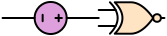

In [3]:
# Fill on paths (like the gate) and shapes (like the source)
d = schemdraw.Drawing()
d.add(elm.SourceV().right().fill('plum'))
d.add(logic.Xnor().fill('bisque'))
d.draw()

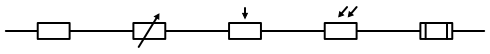

In [4]:
# IEEE vs IEC style
elm.style(elm.STYLE_IEC)
d = schemdraw.Drawing()
d += elm.Resistor()
d += elm.ResistorVar()
d += elm.Potentiometer()
d += elm.Photoresistor()
d += elm.Fuse()
d.draw()

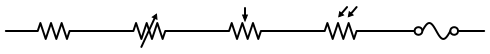

In [5]:
elm.style(elm.STYLE_IEEE)
d = schemdraw.Drawing()
d += elm.Resistor()
d += elm.ResistorVar()
d += elm.Potentiometer()
d += elm.Photoresistor()
d += elm.Fuse()
d.draw()

In [6]:
# Custom elm.style per element
from functools import partial
elm.style({'Diode': partial(elm.Diode, fill='red')})
elm.Diode()

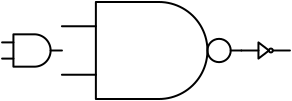

In [7]:
# Scale/zoom
d = schemdraw.Drawing()
d += logic.And()
d += logic.Nand().scale(3)
d += logic.Not().scale(.5)
d

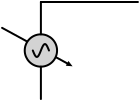

In [8]:
# Zorder. Arrow goes behind.
class TestZorder(elm.SourceSin):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.segments.append(schemdraw.Segment([[1.2, 1.2], [0, -1]], arrow='>',
                                          arrowwidth=.12, arrowlength=.2, zorder=0))

d = schemdraw.Drawing()
d.add(TestZorder().fill('lightgray'))
d.add(elm.Line().right())
d.draw()

In [9]:
# Themes
def drawtheme(theme):
    schemdraw.theme(theme)
    d = schemdraw.Drawing()
    d += elm.Fuse()  # Use Fuse since it shows open dots that should fill with bg color
    return d
    
drawtheme('default')

In [10]:
drawtheme('dark')

In [11]:
drawtheme('solarizedd')

In [12]:
drawtheme('solarizedl')

In [13]:
drawtheme('monokai')

In [14]:
drawtheme('onedork')

In [15]:
drawtheme('oceans16')

In [16]:
drawtheme('gruvboxl')

In [17]:
drawtheme('gruvboxd')

In [18]:
drawtheme('chesterish')

In [19]:
drawtheme('grade3')

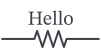

In [20]:
# Setting drawing defaults, can be overridden by elements
d = schemdraw.Drawing(font='Times', fontsize=20)
d += elm.Resistor().label('Hello')
d.draw()

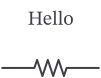

In [21]:
d = schemdraw.Drawing(font='Times', fontsize=20, lblofst=1)
d += elm.Resistor().label('Hello')
d.draw()

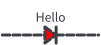

In [22]:
d = schemdraw.Drawing(ls='--', lw=3, fill='red')
d += elm.Diode().label('Hello')
d.draw()

In [23]:
elm.Resistor().linestyle('--')

In [24]:
elm.Resistor().linewidth(3)

In [25]:
elm.Resistor(capstyle='butt')

In [26]:
elm.Resistor().color('blue')

In [27]:
elm.Diode().fill('orange')

In [28]:
elm.Diode().style(color='red', fill='yellow', ls=':', lw=3)

In [29]:
elm.Diode().color('blue').fill(True)  # fill=True picks up element color (poly segment)

In [30]:
d = schemdraw.Drawing(fill='red')
d += elm.Diode().color('blue').fill(False)  # fill=False leaves open even with drawing fill set
d

In [31]:
logic.And().color('blue').fill(True)  # fill=True picks up element color (poly segment)

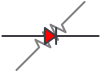

In [32]:
# Resistor should go behind
d = schemdraw.Drawing()
d += (D := elm.Diode().zorder(3))
d += elm.Resistor(d=45).at(D.center).anchor('center').color('gray')
d

In [33]:
(elm.Capacitor()
     .label('L', font='serif', loc='lft')
     .label('R', font='serif', loc='rgt')
     .label('T', font='serif', loc='top')
     .label('B', font='serif', loc='bot'))

In [34]:
# REMAINING TESTS SHOULD RAISE WARNINGS
elm.Resistor().up().down()

/home/collindelker/Code/schemdraw/schemdraw/elements/elements.py:730: UserWarning: Duplicated direction parameter in element. `up` changed to `down`.
  warnings.warn(f"Duplicated direction parameter in element. `{self._userparams['d']}` changed to `down`.")


In [35]:
elm.Resistor().down().up()

/home/collindelker/Code/schemdraw/schemdraw/elements/elements.py:721: UserWarning: Duplicated direction parameter in element. `down` changed to `up`.
  warnings.warn(f"Duplicated direction parameter in element. `{self._userparams['d']}` changed to `up`.")


In [36]:
elm.Resistor().up().left()

/home/collindelker/Code/schemdraw/schemdraw/elements/elements.py:739: UserWarning: Duplicated direction parameter in element. `up` changed to `left`.
  warnings.warn(f"Duplicated direction parameter in element. `{self._userparams['d']}` changed to `left`.")


In [37]:
elm.Resistor().up().right()

/home/collindelker/Code/schemdraw/schemdraw/elements/elements.py:748: UserWarning: Duplicated direction parameter in element. `up` changed to `right`.
  warnings.warn(f"Duplicated direction parameter in element. `{self._userparams['d']}` changed to `right`.")


In [38]:
elm.Resistor().up().theta(45)

/home/collindelker/Code/schemdraw/schemdraw/elements/elements.py:115: UserWarning: Duplicate direciton parameter in element: `up` replaced with `theta=45`
  warnings.warn(f"Duplicate direciton parameter in element: `{self._userparams['d']}` replaced with `theta={theta}`")


In [39]:
elm.Resistor().at((1,1)).at((2,2))

/home/collindelker/Code/schemdraw/schemdraw/elements/elements.py:135: UserWarning: Duplicate `at` parameter in element: `Point(1,1)` changed to `Point(2,2)`.
  warnings.warn(f"Duplicate `at` parameter in element: `{self._userparams['at']}` changed to `{xy}`.")


In [40]:
elm.Resistor().anchor('center').anchor('center')

/home/collindelker/Code/schemdraw/schemdraw/elements/elements.py:164: UserWarning: Duplicate anchor parameter in element: `center` changed to `center`.
  warnings.warn(f"Duplicate anchor parameter in element: `{self._userparams['anchor']}` changed to `{anchor}`.")
